# Example of U-FISH finetune
This tutorial demonstrates how to perform finetune training on U-FISH.


## Install dependency and download dataset

In [ ]:
!pip install ufish
!wget https://huggingface.co/datasets/NaNg/TestData/resolve/main/FISH_spots/suntag.zip?download=true -O suntag.zip
!unzip suntag.zip -d dataset/
!rm suntag.zip


## File and directory structure of the dataset

You need to prepare Test and Valid data, which are placed in different folders.
If you need to evaluate the quality of the results, you also need to prepare test data.

These folders contain a series of image files and csv files, as shown below:


In [7]:
!ls dataset
!echo ----- Train data example -----
!ls dataset/suntag/train/ | head -n 10
!echo ...
!ls dataset/suntag/train/ | wc -l
!echo ----- Valid data example -----
!ls dataset/suntag/valid/ | head -n 10
!echo ...
!ls dataset/suntag/valid/ | wc -l
!echo ----- Test data example -----
!ls dataset/suntag/test/ | head -n 10
!echo ...
!ls dataset/suntag/test/ | wc -l

suntag
----- Train data example -----
suntag_100.csv
suntag_100.tif
suntag_101.csv
suntag_101.tif
suntag_102.csv
suntag_102.tif
suntag_103.csv
suntag_103.tif
suntag_104.csv
suntag_104.tif
...
670
----- Valid data example -----
suntag_336.csv
suntag_336.tif
suntag_337.csv
suntag_337.tif
suntag_338.csv
suntag_338.tif
suntag_339.csv
suntag_339.tif
suntag_340.csv
suntag_340.tif
...
168
----- Test data example -----
suntag_420.csv
suntag_420.tif
suntag_421.csv
suntag_421.tif
suntag_422.csv
suntag_422.tif
suntag_423.csv
suntag_423.tif
suntag_424.csv
suntag_424.tif
...
210


The image files need to be single-channel images and ensure that all images under the train/ directory have the same size. The recommended size is 512 * 512 pixels.

Image shape: (512, 512)


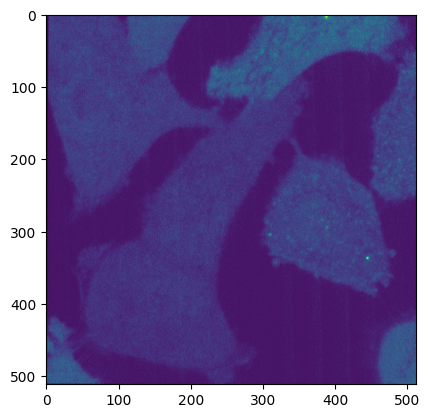

In [15]:
from skimage.io import imread
import matplotlib.pyplot as plt

im0 = imread("./dataset/suntag/train/suntag_100.tif")
print("Image shape:", im0.shape)
plt.imshow(im0)

The CSV file contains the coordinates of annotated points for corresponding images, with two columns (axis-0, axis-1), which correspond to the y and x coordinates.


In [16]:
!cat dataset/suntag/train/suntag_100.csv

axis-0,axis-1
305.5,309.5
2.50044681199995,387.684911838
337.18243060500004,444.606538934


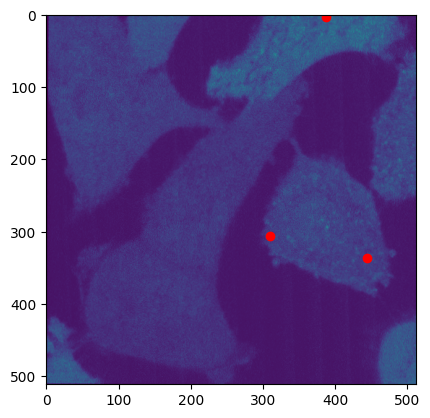

In [17]:
import pandas as pd
df0 = pd.read_csv("dataset/suntag/train/suntag_100.csv")
plt.imshow(im0)
plt.scatter(y=df0.iloc[:,0],x=df0.iloc[:,1],c='r')

## Training

It is recommended to use Nvidia GPU for training. Use the following command to check the status of the GPU:

In [18]:
!nvidia-smi

Thu Feb 22 14:16:37 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

First, we download the pre-trained weights. You can find our weights in this repository: https://huggingface.co/GangCaoLab/U-FISH/tree/main

In [19]:
!wget https://huggingface.co/GangCaoLab/U-FISH/resolve/main/v1.0-alldata-ufish_c32.pth?download=true -O v1.0-alldata-ufish_c32.pth

--2024-02-22 14:16:44--  https://huggingface.co/GangCaoLab/U-FISH/resolve/main/v1.0-alldata-ufish_c32.pth?download=true
Resolving huggingface.co (huggingface.co)... 18.164.174.17, 18.164.174.23, 18.164.174.55, ...
Connecting to huggingface.co (huggingface.co)|18.164.174.17|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/5e/81/5e819a4ba41c037c0ebc05741e83949fc4063f7c055026ed548fdd8628e2b539/41052b7d8279c4fb73b17f85ca0237f7a86f754109428bd59937e7276a23a767?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27v1.0-alldata-ufish_c32.pth%3B+filename%3D%22v1.0-alldata-ufish_c32.pth%22%3B&Expires=1708870604&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcwODg3MDYwNH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy81ZS84MS81ZTgxOWE0YmE0MWMwMzdjMGViYzA1NzQxZTgzOTQ5ZmM0MDYzZjdjMDU1MDI2ZWQ1NDhmZGQ4NjI4ZTJiNTM5LzQxMDUyYjdkODI3OWM0ZmI3M2IxN2Y4NWNhMDIzN2Y3YTg2Z

Here we use the CLI of U-FISH for training:

In [21]:
!ufish load-weights v1.0-alldata-ufish_c32.pth - train -n 20 dataset/suntag/train dataset/suntag/valid --model_save_dir model_save/

2024-02-22 14:17:24.081 | INFO     | ufish.api:init_model:70 - Initializing ufish model with kwargs: {}
2024-02-22 14:17:24.081 | INFO     | ufish.api:init_model:72 - Number of parameters: 162959
2024-02-22 14:17:24.218 | INFO     | ufish.api:init_model:78 - CUDA is available, using GPU.
2024-02-22 14:17:24.219 | INFO     | ufish.api:_load_pth_file:232 - Loading weights from v1.0-alldata-ufish_c32.pth
2024-02-22 14:17:24.618327: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-22 14:17:24.618370: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-22 14:17:24.619596: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBL

If everything goes smoothly, we expect to see a rapid decrease in loss during the training process. The finally fine-tuned model will be saved:

In [22]:
!ls model_save

best_model.pth	model_0.pth  model_10.pth  model_15.pth  model_5.pth


## Evaluation

After completing the training, we can take the best-performing model on the valid dataset and validate it on the test dataset to see how well it performs.

In [25]:
# run prediction
!ufish load_weights ./model_save/best_model.pth - predict_imgs ./dataset/suntag/test/ ./predict --img_glob="*.tif"

2024-02-22 14:27:37.823 | INFO     | ufish.api:init_model:70 - Initializing ufish model with kwargs: {}
2024-02-22 14:27:37.823 | INFO     | ufish.api:init_model:72 - Number of parameters: 162959
2024-02-22 14:27:37.960 | INFO     | ufish.api:init_model:78 - CUDA is available, using GPU.
2024-02-22 14:27:37.961 | INFO     | ufish.api:_load_pth_file:232 - Loading weights from ./model_save/best_model.pth
2024-02-22 14:27:37.975 | INFO     | ufish.cli:predict_imgs:240 - Predicting images in ./dataset/suntag/test/
2024-02-22 14:27:37.975 | INFO     | ufish.cli:predict_imgs:241 - Saving results to predict
2024-02-22 14:27:37.975 | INFO     | ufish.cli:predict_imgs:243 - (1/105) Predicting dataset/suntag/test/suntag_473.tif
2024-02-22 14:27:38.051 | INFO     | ufish.cli:predict:166 - Predicting dataset/suntag/test/suntag_473.tif
2024-02-22 14:27:40.395 | INFO     | ufish.cli:predict:171 - Axes not specified, infering from image shape.
2024-02-22 14:27:40.396 | INFO     | ufish.cli:predict:17

In [26]:
# run evaluation
!ufish evaluate_imgs ./predict/ ./dataset/suntag/test ./eval.csv

2024-02-22 14:28:01.377 | INFO     | ufish.cli:evaluate_imgs:384 - Evaluating 105 images
2024-02-22 14:28:01.497 | INFO     | ufish.cli:evaluate_imgs:423 - Evaluated (1/105) suntag_518, f1(cutoff=3): 1.0000, pred num: 3, true num: 3, true positive: 3, false negative: 0, false positive: 0, recall: 1.0000, precision: 1.0000, mean distance: 0.5974
2024-02-22 14:28:01.502 | INFO     | ufish.cli:evaluate_imgs:423 - Evaluated (2/105) suntag_428, f1(cutoff=3): 0.6667, pred num: 3, true num: 6, true positive: 3, false negative: 3, false positive: 0, recall: 0.5000, precision: 1.0000, mean distance: 0.6097
2024-02-22 14:28:01.506 | INFO     | ufish.cli:evaluate_imgs:423 - Evaluated (3/105) suntag_516, f1(cutoff=3): 1.0000, pred num: 10, true num: 10, true positive: 10, false negative: 0, false positive: 0, recall: 1.0000, precision: 1.0000, mean distance: 0.6215
2024-02-22 14:28:01.509 | INFO     | ufish.cli:evaluate_imgs:423 - Evaluated (4/105) suntag_426, f1(cutoff=3): 0.7826, pred num: 9, tr

In [27]:
import pandas as pd
eval_df = pd.read_csv("./eval.csv")
eval_df = eval_df[eval_df['true num'] != 0]  # remove empty image
print("Mean f1(cutoff=3.0):", eval_df['f1(cutoff=3)'].mean())

Mean f1(cutoff=3.0): 0.8448672164793175


We can draw out and take a look at some results.

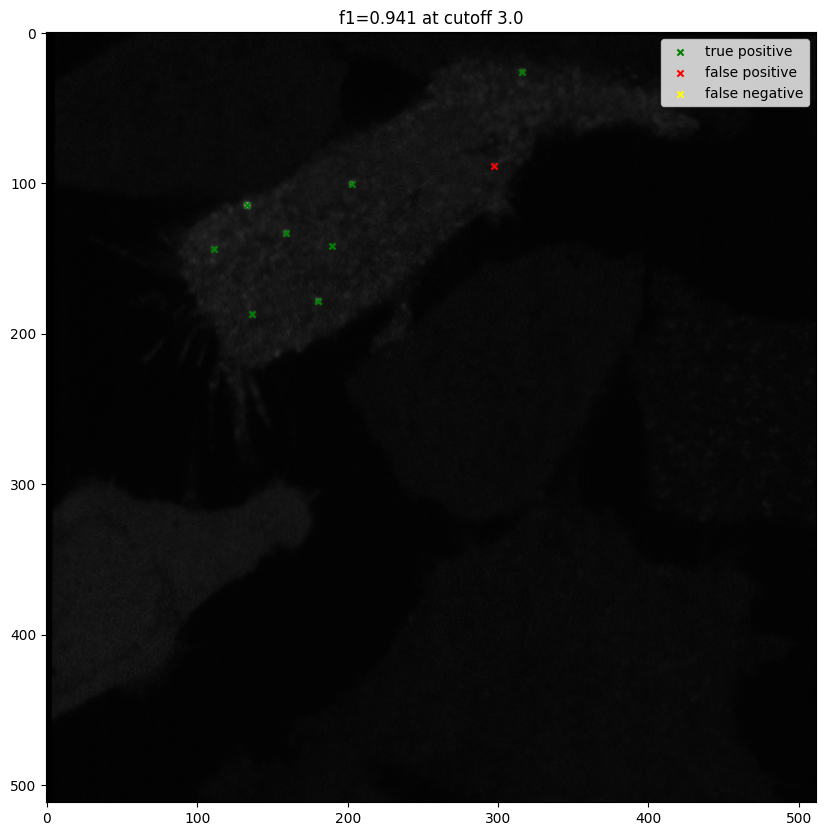

In [35]:
from ufish.cli import UFishCLI

ufish = UFishCLI()
sample = "suntag_425"
ufish.plot_2d_eval(f"./dataset/suntag/test/{sample}.tif", f"./dataset/suntag/test/{sample}.csv", f"./predict/{sample}.pred.csv")